# Telecom users dataset
# 

Link: https://www.kaggle.com/radmirzosimov/telecom-users-dataset

### Librairies

In [ ]:
import pandas as pd
import numpy as np
import pyspark
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DoubleType

In [ ]:
! sudo apt-get update
! sudo mkdir -p /usr/share/man/man1
! sudo apt-get install -y openjdk-11-jdk
! pip install pyspark
! pip install import-java

Get:1 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Fetched 65.4 kB in 0s (229 kB/s)




openjdk-11-jdk is already the newest version (11.0.9.1+1-1~deb10u2).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
df= pd.read_csv("telecom_users.csv")
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [ ]:
# create SparkSession

spark = SparkSession.builder.master("local[*]") \
                    .appName('SparkTelecom') \
                    .getOrCreate()

# extract SparkContext
sc = spark.sparkContext

print('Spark CPU usage :', sc.defaultParallelism)

Spark CPU usage : 2


In [ ]:
schema = StructType() \
   .add("Unnamed: 0",IntegerType(),True) \
   .add("customerID",StringType(),True) \
   .add("gender",StringType(),True) \
   .add("SeniorCitizen",IntegerType(),True) \
   .add("Partner",StringType(),True) \
   .add("Dependents",StringType(),True) \
   .add("tenure",IntegerType(),True) \
   .add("PhoneService",StringType(),True) \
   .add("MultipleLines",StringType(),True) \
   .add("InternetService",DoubleType(),True) \
   .add("OnlineSecurity ",DoubleType(),True) \
   .add("OnlineBackup",StringType(),True) \
   .add("DeviceProtection",StringType(),True) \
   .add("TechSupport",StringType(),True) \
   .add("StreamingTV",StringType(),True) \
   .add("StreamingMovies",StringType(),True) \
   .add("Contract",StringType(),True) \
   .add("PaperlessBilling",StringType(),True) \
   .add("PaymentMethod",StringType(),True) \
   .add("MonthlyCharges",DoubleType(),True) \
   .add("TotalCharges",DoubleType(),True) \
   .add("Churn",StringType(),True) 

df = spark.read.option("delimiter", ",").option("header", True).schema(schema).csv("telecom_users.csv")
df.show(2)
df.printSchema()
df.createOrReplaceTempView("TELECOM_USERS")



+----------+----------+------+-------------+-------+----------+------+------------+-------------+---------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|Unnamed: 0|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity |       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+----------+------+-------------+-------+----------+------+------------+-------------+---------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|      1869|7010-BRBUU|  Male|            0|    Y

   gender  Total_Gender
0    Male          3050
1  Female          2936


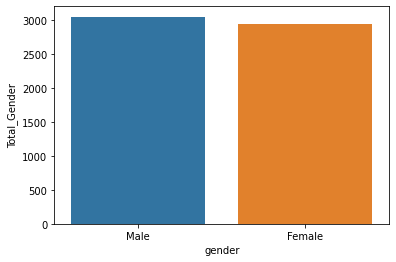

In [ ]:
gender = spark.sql("SELECT gender, COUNT(*) AS Total_Gender FROM TELECOM_USERS GROUP BY 1 ORDER BY 2 DESC")

pandasDF_gender = gender.toPandas()
print(pandasDF_gender)

sns.barplot(x=pandasDF_gender['gender'], y=pandasDF_gender['Total_Gender'])
plt.draw()


In [ ]:
Total_user = spark.sql('SELECT COUNT(*) AS TOTAL_UTILISATEUR FROM TELECOM_USERS')
Total_user.show()

+-----------------+
|TOTAL_UTILISATEUR|
+-----------------+
|             5986|
+-----------------+



In [ ]:
Partner_yes_users = spark.sql('SELECT COUNT(*) AS With_partner FROM TELECOM_USERS WHERE Partner LIKE "Y%"')
Partner_yes_users.show()

Partner_no_users = spark.sql('SELECT COUNT(*) AS NO_ONE_partner FROM TELECOM_USERS WHERE Partner LIKE "N%"')
Partner_no_users.show()

#Partners = spark.sql('( SELECT COUNT(*) AS With_partner FROM TELECOM_USERS WHERE Partner LIKE "Y%" ) UNION DISTINCT ( SELECT COUNT(*) AS NO_ONE_partner FROM TELECOM_USERS WHERE Partner LIKE "N%" )')
#Partners.show()

+------------+
|With_partner|
+------------+
|        2904|
+------------+

+--------------+
|NO_ONE_partner|
+--------------+
|          3082|
+--------------+



In [ ]:
moyenne_abonnement = spark.sql('SELECT ROUND(SUM(tenure)/COUNT(*), 2) AS MOYENNE_ABONNEMENT FROM TELECOM_USERS')
moyenne_abonnement.show()

+------------------+
|MOYENNE_ABONNEMENT|
+------------------+
|             32.47|
+------------------+



In [ ]:
moyenne_abonnement_by_gender = spark.sql('SELECT gender, ROUND(SUM(tenure)/COUNT(*), 2) AS MOYENNE_ABONNEMENT_BY_SEXE FROM TELECOM_USERS GROUP BY gender')
moyenne_abonnement_by_gender.show()

+------+--------------------------+
|gender|MOYENNE_ABONNEMENT_BY_SEXE|
+------+--------------------------+
|Female|                     32.39|
|  Male|                     32.55|
+------+--------------------------+



In [ ]:
# Stats sur la 'tenure' et 'MonthlyCharges'
tenureCharges = spark.sql('SELECT DISTINCT tenure FROM TELECOM_USERS ORDER BY tenure DESC')
tenureCharges.show()

+------+
|tenure|
+------+
|    72|
|    71|
|    70|
|    69|
|    68|
|    67|
|    66|
|    65|
|    64|
|    63|
|    62|
|    61|
|    60|
|    59|
|    58|
|    57|
|    56|
|    55|
|    54|
|    53|
+------+
only showing top 20 rows



In [ ]:
Plus_ancien = spark.sql('SELECT * FROM TELECOM_USERS ORDER BY tenure DESC LIMIT 5')
Plus_ancien.show()

+----------+----------+------+-------------+-------+----------+------+------------+-------------+---------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------+----------------+--------------------+--------------+------------+-----+
|Unnamed: 0|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity |       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+----------+------+-------------+-------+----------+------+------------+-------------+---------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------+----------------+--------------------+--------------+------------+-----+
|      1869|7010-BRBUU|  Male|            0|    Yes|       Yes|    

In [ ]:
moins_longtemps = spark.sql('SELECT * FROM TELECOM_USERS WHERE tenure IS NOT NULL ORDER BY tenure ASC LIMIT 5')
moins_longtemps.show()

+----------+----------+------+-------------+-------+----------+------+------------+----------------+---------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------+----------------+--------------------+--------------+------------+-----+
|Unnamed: 0|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity |       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+----------+------+-------------+-------+----------+------+------------+----------------+---------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------+----------------+--------------------+--------------+------------+-----+
|      6754|2775-SEFEE|  Male|            0|     No|      

In [ ]:
# Stats sur la 'tenure' et 'MonthlyCharges' 
#tenureCharges = spark.sql('SELECT DISTINCT tenure, MonthlyCharges FROM TELECOM_USERS ORDER BY tenure DESC')
#tenureCharges.show()

In [ ]:
#Stats sur le 'Churn' et 'SeniorCitizen' ? Pour voir si les personnes âgées boostent les stats de Churn


  Churn  Total_Services
0    No            4399
1   Yes            1587


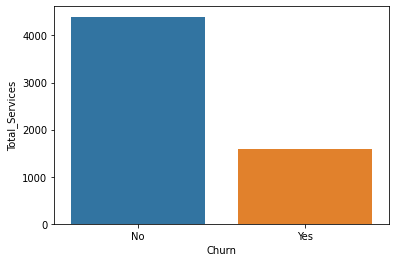

In [ ]:
#Stats sur le 'Churn' pour voir la quantité de clients résiliés
churn = spark.sql("SELECT Churn, COUNT(*) AS Total_Services FROM TELECOM_USERS GROUP BY 1 ORDER BY 2 DESC")

pandasDF_churn = churn.toPandas()
print(pandasDF_churn)

sns.barplot(x=pandasDF_churn['Churn'], y=pandasDF_churn['Total_Services'])
plt.draw()

  InternetService  Total_Services
0     Fiber optic            2627
1             DSL            2068
2              No            1291


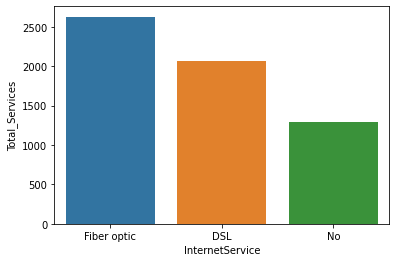

In [ ]:
# nombre total de type of service
type_of_service = spark.sql("SELECT InternetService, COUNT(*) AS Total_Services FROM TELECOM_USERS GROUP BY 1 ORDER BY 2 DESC")

pandasDF_type_of_service = type_of_service.toPandas()
print(pandasDF_type_of_service)

sns.barplot(x=pandasDF_type_of_service['InternetService'], y=pandasDF_type_of_service['Total_Services'])
plt.draw()

  InternetService  Total_Services
0     Fiber optic            2627
1             DSL            2068
2              No            1291


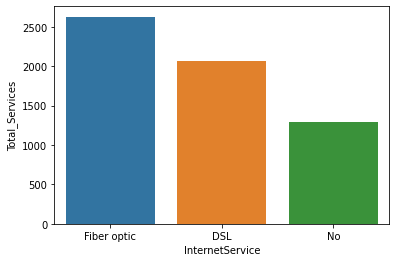

In [ ]:
# time series par rapport à la tenure
type_of_service = spark.sql("SELECT InternetService, COUNT(*) AS Total_Services FROM TELECOM_USERS GROUP BY 1 ORDER BY 2 DESC")

pandasDF_type_of_service = type_of_service.toPandas()
print(pandasDF_type_of_service)

sns.barplot(x=pandasDF_type_of_service['InternetService'], y=pandasDF_type_of_service['Total_Services'])
plt.draw()

### Convertir en DF

gender - client gender (male / female)

SeniorCitizen - is the client retired (1, 0)

Partner - is the client married (Yes, No)

**tenure - how many months a person has been a client of the company**

PhoneService - is the telephone service connected (Yes, No)

MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

InternetService - client's Internet service provider (DSL, Fiber optic, No)

OnlineSecurity - is the online security service connected (Yes, No, No internet service)

OnlineBackup - is the online backup service activated (Yes, No, No internet service)

DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

TechSupport - is the technical support service connected (Yes, No, No internet service)

StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

**Contract - type of customer contract (Month-to-month, One year, Two year)**

*PaperlessBilling - whether the client uses paperless billing (Yes, No)*

PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges - current monthly payment**

**TotalCharges - the total amount that the client paid for the services for the entire time**

**Churn - whether there was a churn (Yes or No)**

In [ ]:
df = spark.read.option("delimiter", ",").csv("telecom_users.csv", header=True)
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
df2= df.toPandas()

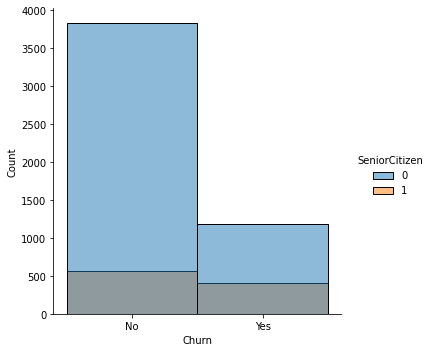

In [ ]:
sns.displot(df2, x="Churn",hue="SeniorCitizen")

<AxesSubplot:xlabel='Contract', ylabel='count'>

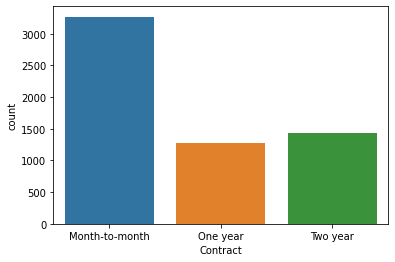

In [ ]:
# Visualiser la répartition des contrats
sns.countplot(x="Contract", data=df2 , order= ['Month-to-month', 'One year' ,'Two year'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=054ccd47-6487-41f2-b86b-f5bb05f69fd8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>